In [ ]:
pip install pca

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
from pca import pca as pca_lib

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/최종 데이터/최종_Eng.xlsx')
data = data.set_index('district')

In [ ]:
# 데이터 스케일링
std_df = StandardScaler().fit_transform(data)
std_df = pd.DataFrame(std_df, index=data.index, columns=data.columns)
data = std_df

In [ ]:
# 벡터수 설정해서 pca생성 및 각 pca의 설명가능한 분산 비율(고윳값), 기여율, 누적기여율을 출력
# 최적 벡터수를 측정할 수 있음

pca = PCA(n_components=10)
pca_array = pca.fit_transform(data)
row, col = pca_array.shape
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=[f"pca{num+1}" for num in range(col)])

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)': pca.explained_variance_,
                       '기여율': pca.explained_variance_ratio_},
                      index=np.array([f"pca{num+1}" for num in range(col)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,18.647500,0.559425,0.559425
pca2,4.393153,0.131795,0.691220
pca3,2.359835,0.070795,0.762015
pca4,1.502456,0.045074,0.807088
pca5,1.461841,0.043855,0.850944
pca6,1.158260,0.034748,0.885691
pca7,0.812046,0.024361,0.910053
pca8,0.717847,0.021535,0.931588
pca9,0.482104,0.014463,0.946051
pca10,0.447665,0.013430,0.959481


[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


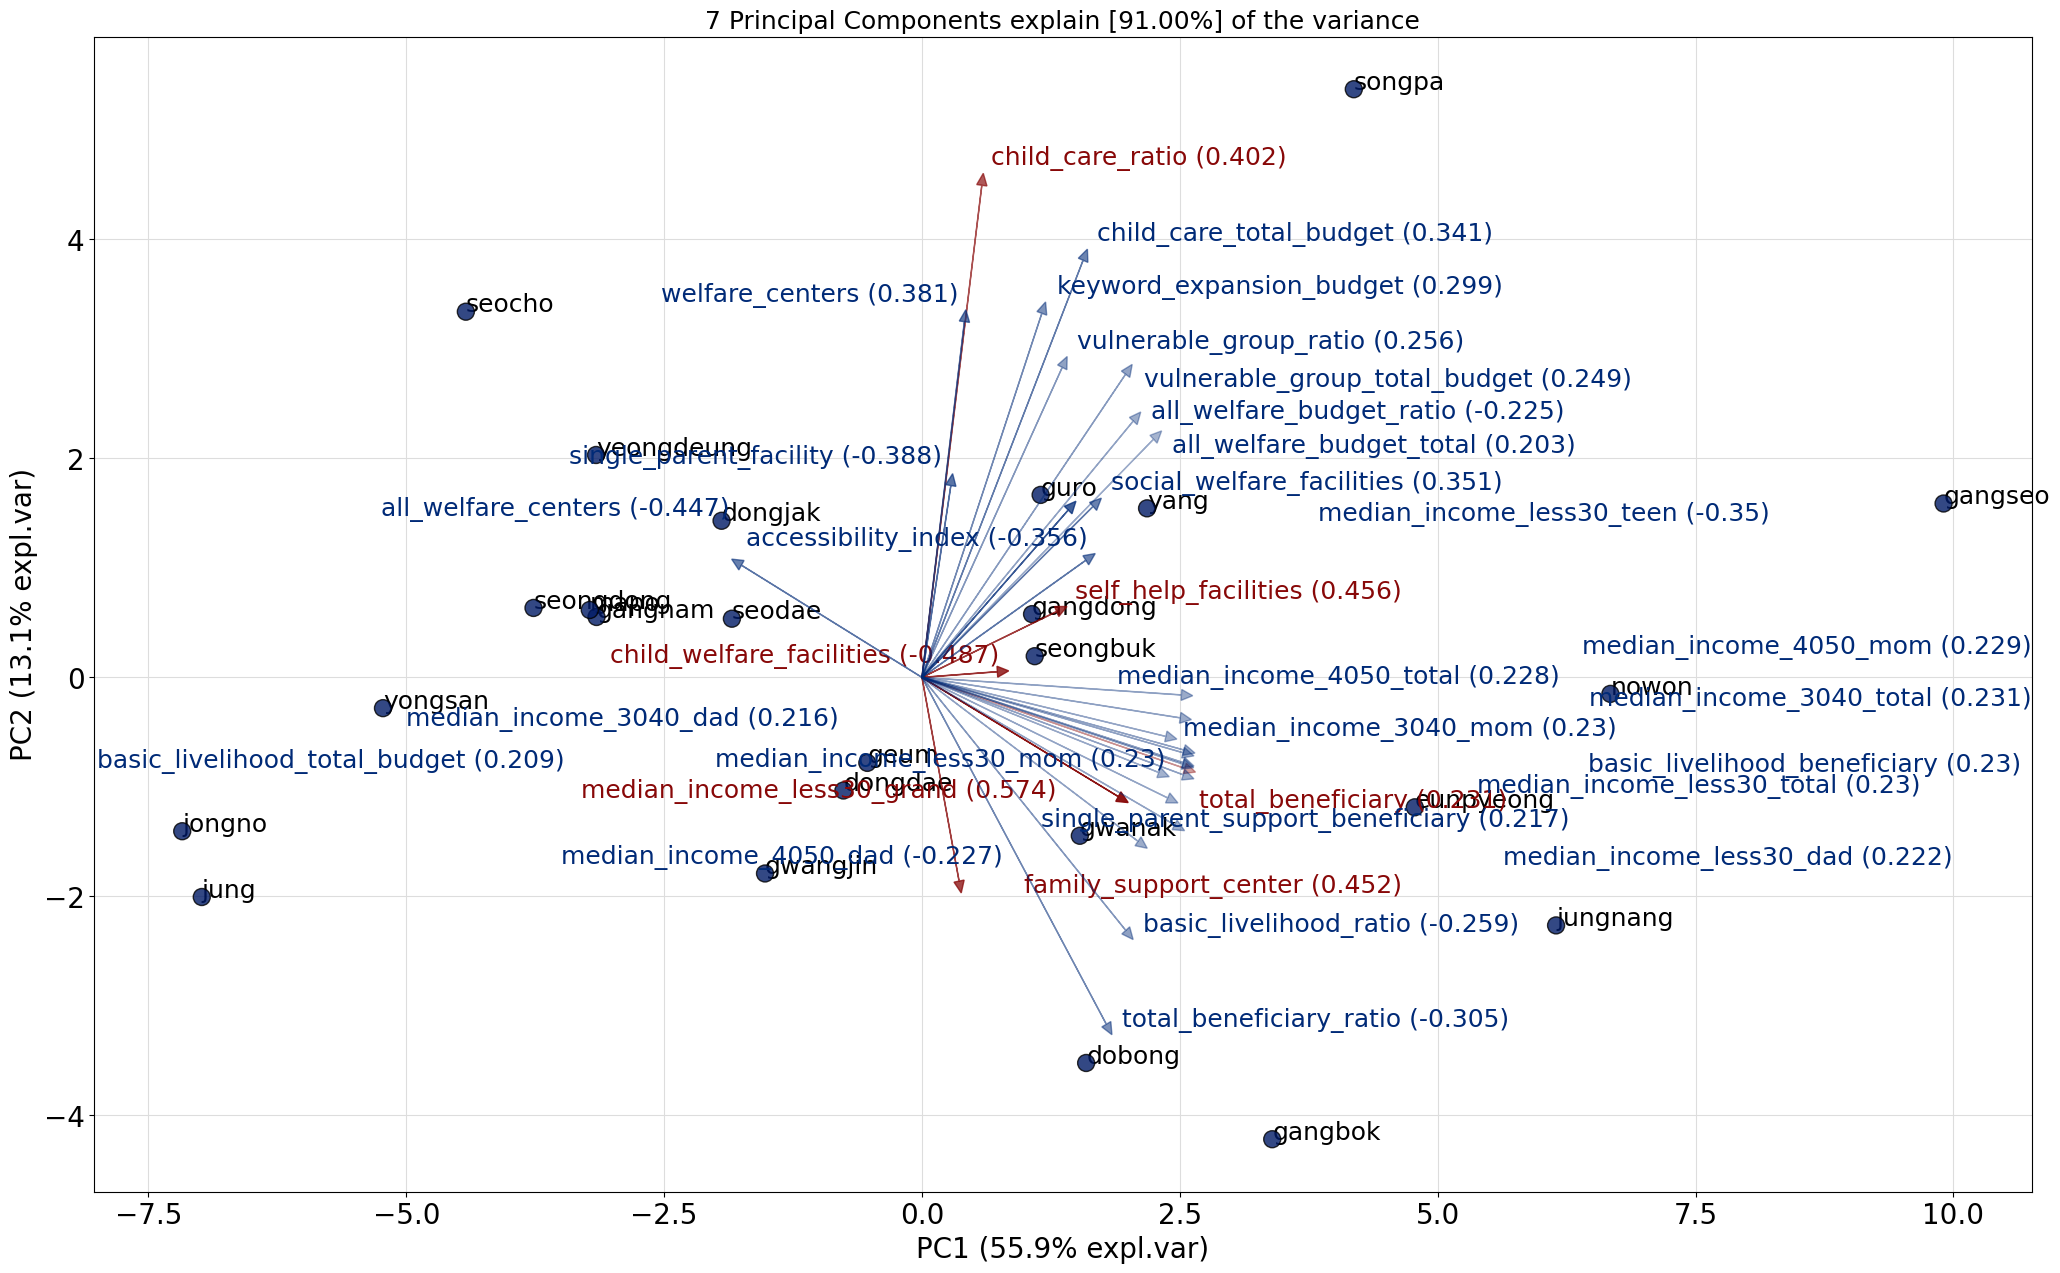

In [ ]:
pca_sklearn = sklearnPCA(n_components=7) # sklearn 라이브러리의 PCA 클래스 객체 생성, 7개의 주 성분으로 차원 축소
pca_array = pca_sklearn.fit_transform(data)  # 주어진 데이터(data)를 7차원에 맞춰 변환
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=['pca1', 'pca2', 'pca3','pca4', 'pca5', 'pca6', 'pca7']) #  변형된 데이터 프레임으로 저장



model = pca_lib(n_components=7) # pca_lib 라이브러리의 PCA 클래스 객체 생성, 7개의 주 성분으로 차원 축소
results = model.fit_transform(data) # 입력 데이터를 주 성분 축에 맞게 변환한 후 결과를 저장
fig, ax = model.biplot(n_feat=32, legend=False, PC=[0, 1]) # n_feat 수에따라 변수 갯수가 달라짐 32개 pca1과 pca2를 기준으로한 변수 모두 넣은 그래프 생성
for i, index in enumerate(data.index):
    ax.annotate(str(index), (results['PC'].iloc[i]['PC1'], results['PC'].iloc[i]['PC2']))
plt.show()

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC3 with loadings.


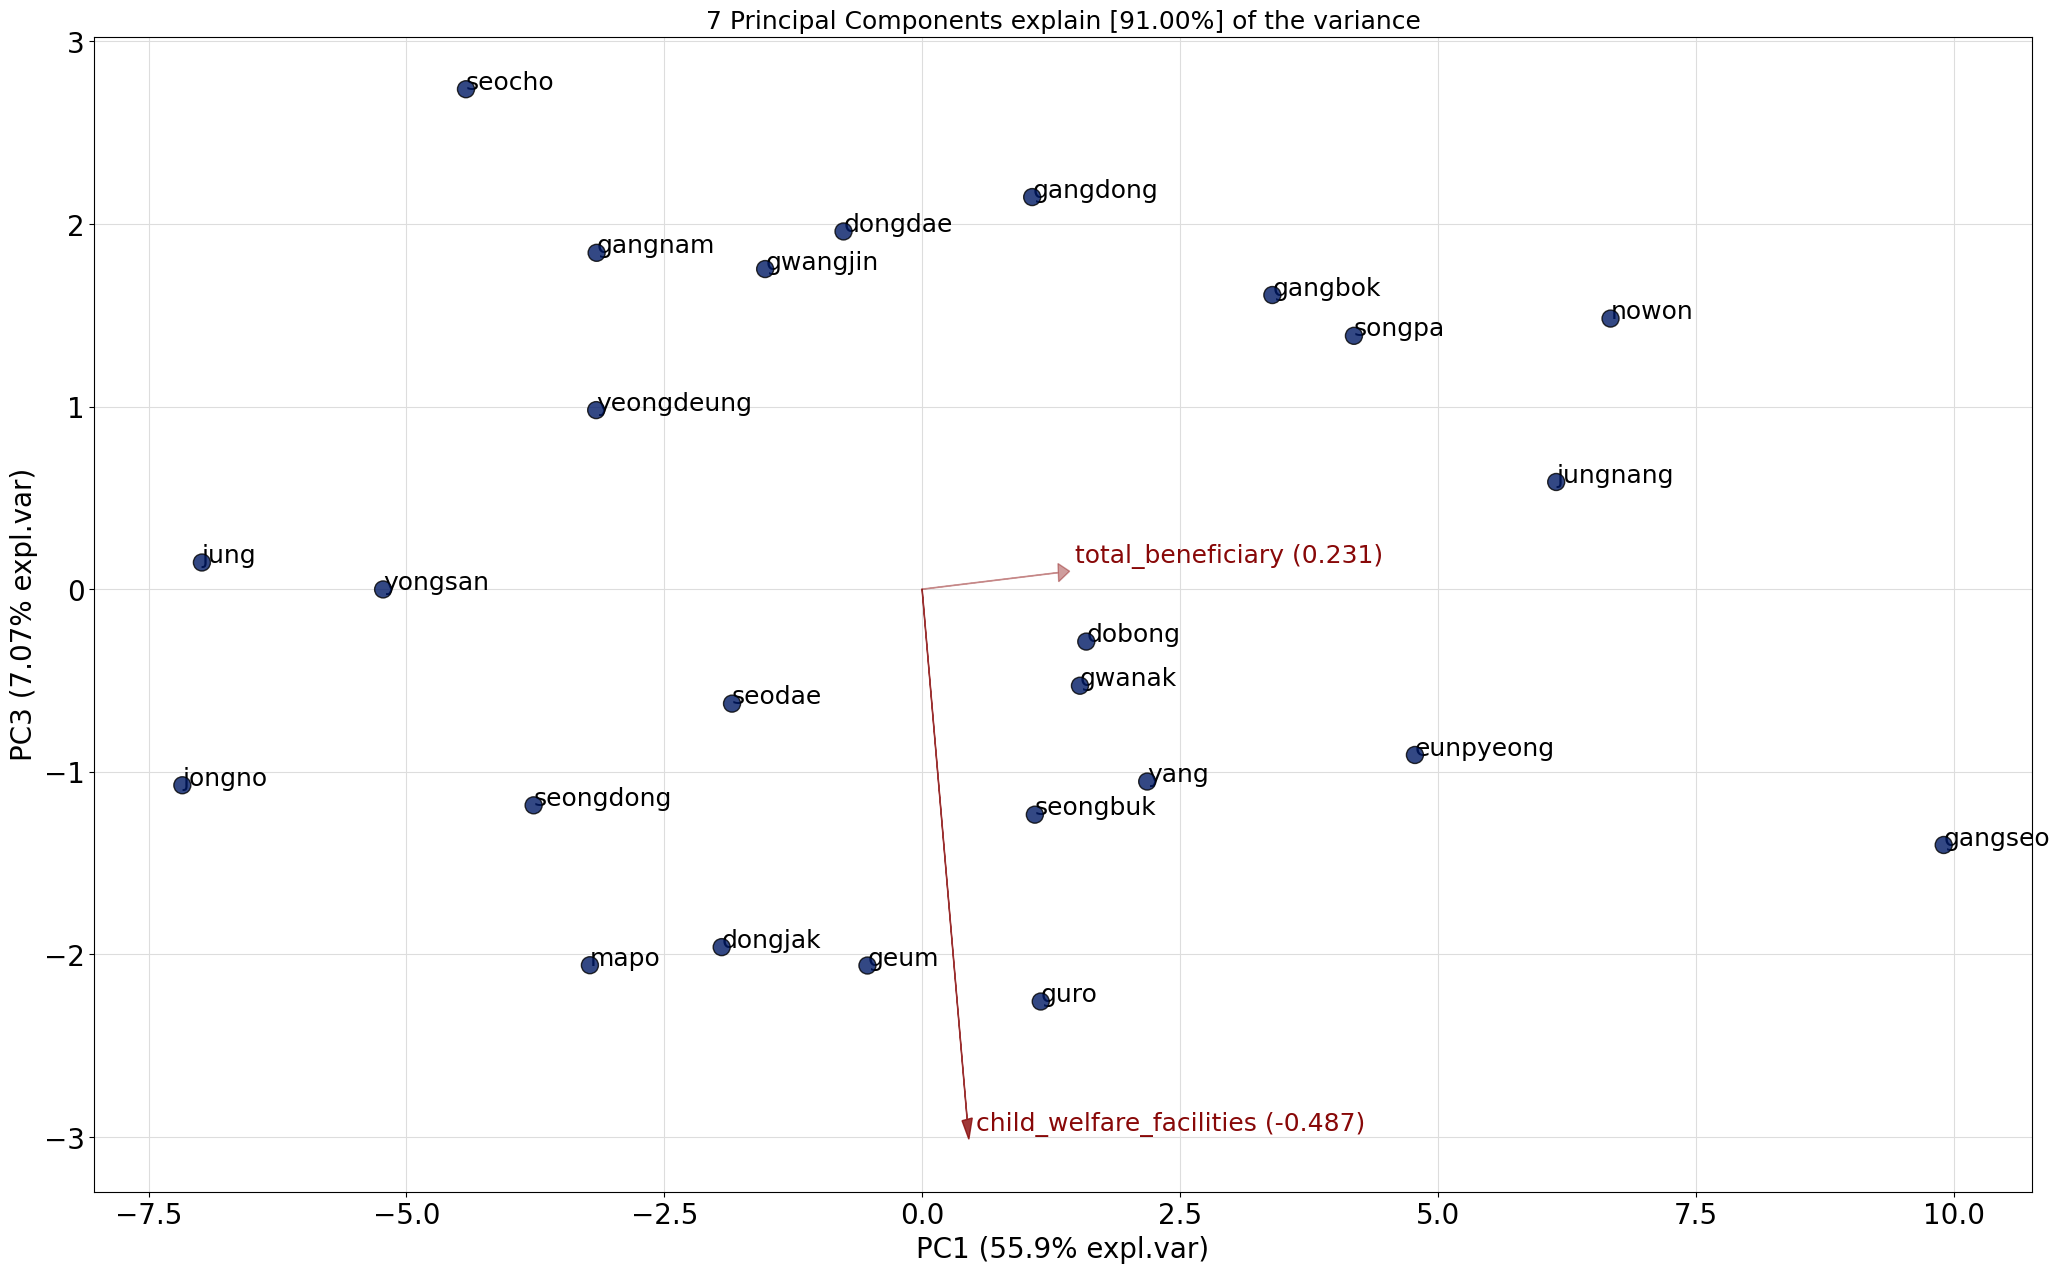

In [ ]:
# pc1과 pc3를 x, y 축 기준으로한 그래프
fig, ax = model.biplot(n_feat=2, legend=False, PC=[0, 2])
for i, index in enumerate(data.index):
    ax.annotate(str(index), (results['PC'].iloc[i]['PC1'], results['PC'].iloc[i]['PC3']))
plt.show()